In [1]:
import numpy as np
from scipy.special import comb
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from utils import generate_random_graph, generate_distance_matrix

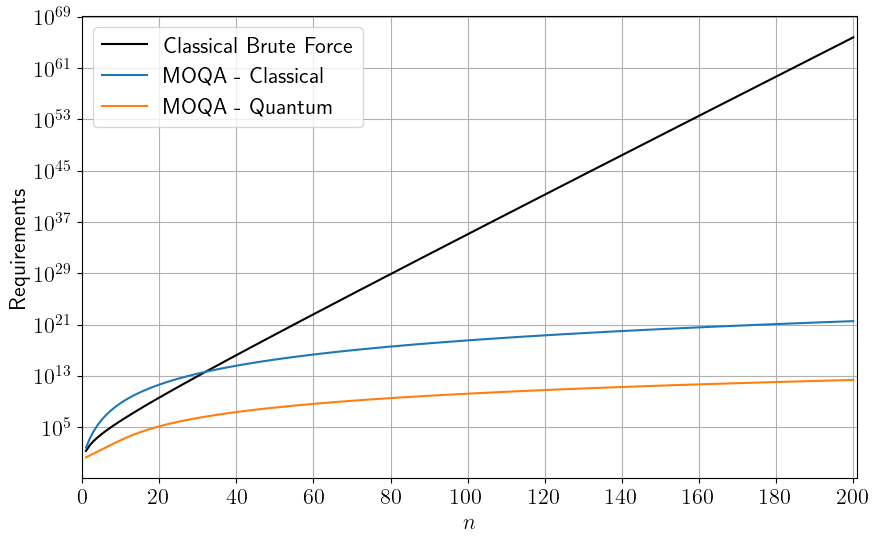

In [2]:
n = 200
p = 4
M = 10
n_values = np.arange(1, n+1, step = 1)

plt.figure(figsize=(10, 6))
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.plot(n_values, [n*n*M*np.exp2(n) for n in n_values], color = 'black', label=r'$\text{Classical Brute Force}$')
plt.plot(n_values, [n*n*(M+3)*comb(int(p + (n**2 + n)/2), p) for n in n_values], label=r'$\text{MOQA - Classical}$')
plt.plot(n_values, [np.sum([comb(n,i) for i in range(2*p)]) for n in n_values], label=r'$\text{MOQA - Quantum}$')
plt.yscale('log')
plt.ylabel(r'$\text{Requirements}$', fontsize=16)
plt.xlabel(r'$n$', fontsize=16)
plt.xlim(0, n+1)
plt.xticks(np.arange(0, n+1, 20))
plt.grid(True)
plt.legend(fontsize=16)

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=16)

plt.savefig("figures/combinations_over_n.pdf", bbox_inches='tight')
plt.savefig("figures/combinations_over_n.svg", bbox_inches='tight')

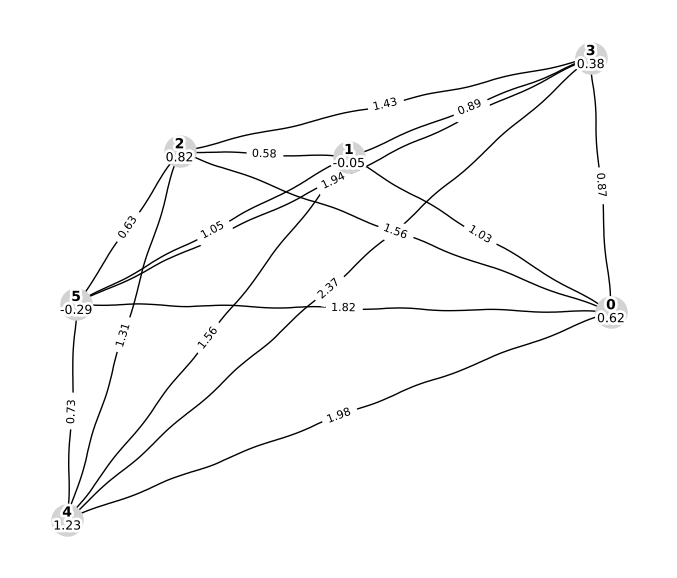

{0: 0.6190756618694475, 1: -0.05433941722861124, 2: 0.821056548001923, 3: 0.37674294398891695, 4: 1.2261832322829005, 5: -0.2912433468165111}
[[0.         1.03396624 1.56346265 0.86572043 1.97642734 1.81627885]
 [1.03396624 0.         0.57560278 0.88716199 1.55938882 1.05223997]
 [1.56346265 0.57560278 0.         1.43177636 1.30752001 0.62608148]
 [0.86572043 0.88716199 1.43177636 0.         2.37020536 1.93672476]
 [1.97642734 1.55938882 1.30752001 2.37020536 0.         0.73284316]
 [1.81627885 1.05223997 0.62608148 1.93672476 0.73284316 0.        ]]


In [3]:
plt.rcParams['text.usetex'] = False

def plot_random_graph(points, vertices, distance_matrix, save_path=None, draw_labels=True):
    n = len(points)
    G = nx.complete_graph(n)

    edge_labels = {
        (u, v): round(distance_matrix[u, v], 2)
        for u, v in G.edges()
    }

    index_labels = {i: str(i) for i in range(n)}
    value_labels = {i: f"{vertices[i]:.2f}" for i in range(n)}

    with plt.xkcd():
        fig, ax = plt.subplots(figsize=(7, 7))

        nx.draw_networkx_nodes(G, points,
                               node_size=500,
                               node_color='lightgrey',
                               ax=ax)
        nx.draw_networkx_edges(G, points, ax=ax)
        
        if draw_labels:

            nx.draw_networkx_labels(G, points, labels=index_labels,
                                    font_size=10, font_weight="bold", ax=ax,
                                    verticalalignment="bottom")

            nx.draw_networkx_labels(G, points, labels=value_labels,
                                    font_size=9, ax=ax,
                                    verticalalignment="top")
            
            nx.draw_networkx_edge_labels(G, points,
                                         edge_labels=edge_labels,
                                         font_size=8, ax=ax)

        ax.set_aspect('equal')
        ax.axis('off')

        plt.tight_layout()

        if save_path:
            plt.savefig(save_path+".pdf", bbox_inches='tight')
            plt.savefig(save_path+".svg", bbox_inches='tight')
        plt.show()


points, vertices = generate_random_graph(n=6, seed=27)
distance_matrix = generate_distance_matrix(points)

plot_random_graph(points, vertices, distance_matrix, save_path="figures/graph")

print(vertices)
print(distance_matrix + distance_matrix.transpose())


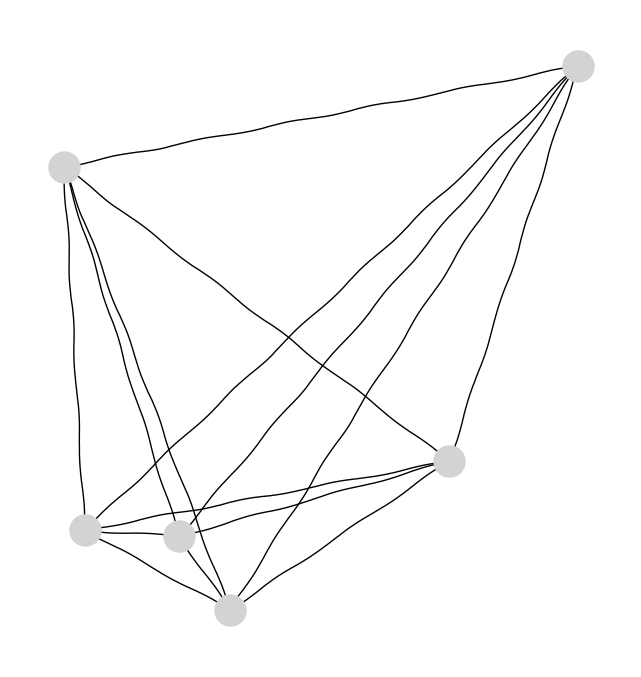

In [4]:
plt.rcParams['text.usetex'] = False
points, vertices = generate_random_graph(n=6, seed=0)
distance_matrix = generate_distance_matrix(points)

plot_random_graph(points, vertices, distance_matrix, save_path="figures/graph_unlabeled", draw_labels=False)


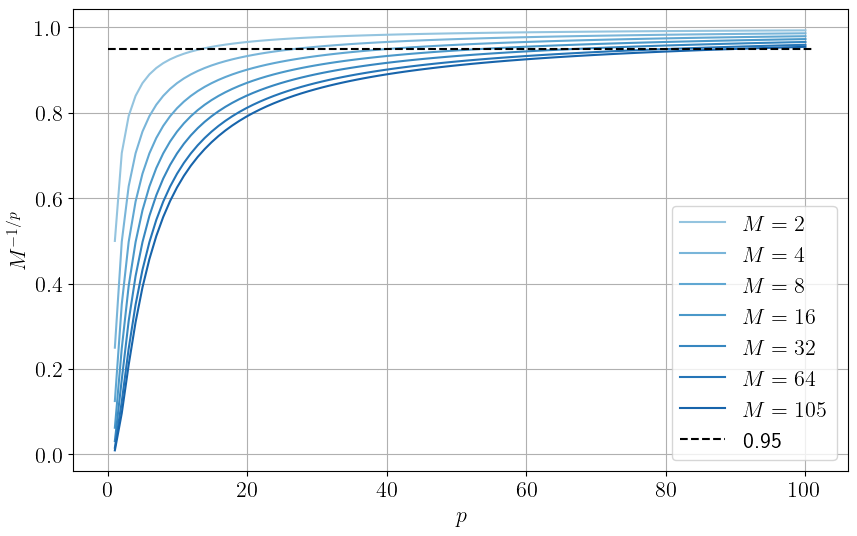

In [5]:
plt.rcParams['text.usetex'] = True
M_values = [2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 105]
blue_colors = cm.Blues(np.linspace(0.4, 0.8, len(M_values)))

p_values = np.linspace(1, 100, 101)

plt.figure(figsize=(10, 6))
for index, M in enumerate(M_values):
    p_roots = M ** (-1 / p_values)
    plt.plot(p_values, p_roots, label=rf'$M = {M}$', color=blue_colors[index])

plt.plot([0, max(p_values) + 1], [0.95, 0.95], 'k--', label='0.95')

plt.xlabel(r"$p$", fontsize=16)
plt.ylabel(r"$M^{-1/p}$", fontsize=16)
plt.legend(fontsize=16)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.savefig("figures/p_root.pdf", bbox_inches='tight')
plt.savefig("figures/p_root.svg", bbox_inches='tight')
plt.show()